### 

<img src="https://i.ibb.co/TM3LtWV/Financial-logo-hand-dollars-logo.png" width=500>


## Initial Focus 

The purpose of this project is to create a loan prediction model for the Underwriting Team of The Regional Bank of America.


## Background Information

Underwriting is the process of evaluating the risk involved with a financial transaction, such as a bank loan. Manual underwriting processes are inconsistent, lack accuracy, and are time-consuming. Automating your loan process can streamline the work that needs to be completed, offering an accurate and consistent data flow for every step of your loan process.

Automated underwriting is a technology-driven underwriting process that provides a computer generated loan decision. The lending industry is broadly migrating to the use of new technology-driven loan underwriting platforms to improve the processing time for all types of loans.

## Proposal

The prediction of loan approvals depends on a lot of factors like the credit score, age of the customer, delinquent history, income etc. Here are the list of features that can be used to predict whether a loan for an individual could be approved or not. 

> - approved: Target Variable



| Feature          	| Descriptions                              	                            |
| :---              | :---                                                                      |
| gender: 	| Gender of the customer.                                                  |
| age:         | Age of the customer. |
| bank_customer:            | Whether the person is a customer at the bank or not.                               |
| Emp_*:          | Which industry does the customer works in (Industrial, Materials, Comsumer_Services, Healthcare etc.  |
| Ethnicity_*:      | Ethnicity of the customer (White, Black, Latino, Asian, other).                 |
| years_employed:         | Number of years the Custromer is working for.                                      |
| credit_score:         | Credit score of the customer.                                      |
| drivers_license:         | Whether the customer has the driver's license or not.                                      |
| Citizen*:         | Is the customer a citizen of the United States.(bybirth, other, teporary)                             |
| Income:         | Income of the customer.                                      |


## Specification

- Python: 3.9.12
- Pandas: 1.4.3
- Seaborn: 0.11.2
- sklearn: 1.1.2.
- Numpy: 1.21.5

This data contains the data of overall 75 employees.  The target variable of interest is task_completed. The data was provided as a part of our CIS: 508 Assignment.


## Table of Contents: <a class="anchor" id="steps"></a>
- [1. Libraries & Custom Functions](#libraries)
- [2. Data Wrangling](#wrangle)
   - [2.1 Data Gathering](#gather)
   - [2.2 Data Assessment](#assess)
   - [2.3 Data Cleaning](#clean)
- [3. Model Building](#model)
    - [3.1 Model 1](#model001)
    - [3.2 Model 2](#model002)
- [4. Model Comparison](#comparison)
- [5. Model Evaluation](#evaluation)
- [6. Conclusion](#conclusion)
- [7. Deployment](#deployment)



## 1. Libraries & Custom Functions <a class="anchor" id="libraries"></a>

> [Table of Contents](#steps)

In [1]:
import pandas as pd                                                     # Pandas offers data structures and operations for manipulating numerical tables and time series.

from sklearn.linear_model import LogisticRegression                     # The logistic model is a statistical model that models the probability of one event taking place 
                                                                        # by having the log-odds for the event be a linear combination of one or more independent variables.                      

from sklearn.metrics import accuracy_score                              # Importing only the required LogisticRegression, and accuracy_score (this function computes 
                                                                        # subset accuracy)from sklearn, because importing an entire package may be significant waste of RAM.

import pickle                                                           # Using Pickle to convert a Python object into a byte stream to store it in a file/database, 
                                                                        # maintain program state across sessions, making it easier to work with in deployments. 
import seaborn as sns                                                   # Importing Seaborn, A library for making statistical graphics in Python.
import matplotlib.pyplot as plt                                         # Importing matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB.
pd.set_option('display.max_columns', None)                              # To print the above output in a wider format. This attribute is used to set the no. of columns 
                                                                        # to show in the display of the pandas dataframe.
import numpy as np                                                      # NumPy offers support for large, multi-dimensional arrays and matrices, along with a large collection 
                                                                        # of high-level mathematical functions to operate on these arrays.
from itertools import chain                                             # itertools has a collection of functions that are used for handling iterators. chain in particular, 
                                                                        # takes a series of iterables and returns one iterable. It groups all the iterables together and 
                                                                        # produces a single iterable as output. It will used to flatten a 2d lists. 
import re                                                               # Re library helps in searching and replacing. The regex method searches a string and then replace
                                                                        # it with some other value. Python re.sub() function in the re module is used to do so.
import plotly.express as px                                             # Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration.
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.
                                                                            # It helps in identifying multicolinearity among the numerical data. 

# Machine Learning libraries required for Linear Regression.    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.preprocessing import StandardScaler   
# Importing logistic and KNN classifiers from sklearn Library
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

# Importing error metrics here.
from sklearn import metrics
import statsmodels.api as sm

# To get rid of scientific notations used to disply large numbers. 
pd.options.display.float_format = '{:.2f}'.format  


In [2]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    FNR = []
    FPR = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.10).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))
        FPR.append((metrics.confusion_matrix(y_test, y_test_pred_class)[0,1] / 
                (metrics.confusion_matrix(y_test, y_test_pred_class)[0,1] + 
                 metrics.confusion_matrix(y_test, y_test_pred_class)[0,0]) ).round(2))
        FNR.append((metrics.confusion_matrix(y_test, y_test_pred_class)[1,0] / 
                (metrics.confusion_matrix(y_test, y_test_pred_class)[1,0] + 
                 metrics.confusion_matrix(y_test, y_test_pred_class)[1,1]) ).round(2))

    # Create dataframe
    result = pd.DataFrame({"Threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FPR":FPR,
                           "FN":FN,
                           "FNR":FNR,
                           "Precision":precision,
                           "Recall":recall,
                           "F1-score":F1,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# Highlight_data function is used to highlight the columns in a data frame with red color, 
# if the value of the particular cell is True. It takes dataframe as an arguement.

def highlight_data(value):                                              
    highlight = 'background-color:  #FFB3BA;'
    if value == True:
            return highlight

# Summary_stats takes dataframe as an argument, it provides the summary statists of all the
# numerical variables in the dataset. The statistics includes, mean, median, standard deviation,
# minimum, maximum, skewness, kurtosis, number of missing values, and whether a coulumn could be
# a potential outlier. It also highlights the potential outliers based on high skewness
# and high kurtosis with red color.
        
def summary_stats(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']     
    df_temp = df.select_dtypes(include=numerics)
    X=(pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min().round(2),
                  max_val = df_temp.max().round(2),
                  skewness = df_temp.skew().round(2),
                  kurtosis = df_temp.kurt().round(2),
                  missing_vals = df_temp.isnull().sum(),
                  potential_outlier = np.where( (df_temp.skew() > 3) | (df_temp.skew() < - 3) | (df_temp.kurt() > 10) | (df_temp.kurt() < -10),
                                                      True,False)
                 )))
    global outlier_columns
    outlier_columns = X[X.potential_outlier==True].index
    X = X.style.format(precision=2).applymap(highlight_data, subset=['potential_outlier'])
    return(X)

# Outlier_detection method helps in detecting the presence of outliers in the dataset. It takes 
# dataframe as an argument and estimate the inter-quartile range and outputs a new dataframe with
# quartile1, quartile3, IQR, lower bound, upper bound, and the percentage of outliers present.

def outlier_detection(x):
    q3,q1=np.percentile(x, [75,25])
    iqr = (q3-q1).round(2)
    mn = q1-1.5*iqr
    mx = q3+1.5*iqr
    return(x.min(),
           x.max(),
           q1,
           q3,
           iqr,
           mn,
           mx,
           x[x<mn].count()+x[x>mx].count(),
           str((((x[x<mn].count()+x[x>mx].count()))/len(x)*100).round(2))+"%")

# Outlier stats funtion takes a dataframe as an argument, and call the outlier_detection function,
# passing the dataframe with potential outliers as an argument. It further highlights the 
# % outliers column in the dataframe.

def outlier_stats(x):
    highlight = 'background-color:  #FFB3BA;'
    df_out=(df[outlier_columns].apply(outlier_detection)).T
    df_out.rename(columns = {0:'Min', 1:'Max',2:'Q1',3:'Q3',4:'IQR',5:'lower_bound',6:'upper_bound',7:'Total_outliers', 8:'%_outliers'}, inplace=True)
    df_out = df_out.style.format(precision=2).apply(lambda x: [highlight], subset=['%_outliers'],axis=1)
    return df_out


## 2. Data Wrangling <a class="anchor" id="wrangle"></a> 

#### 2.1 Data Gathering <a class="anchor" id="gather"></a>

- Loading the Employee dataset into the dataframe for assessment.

> [Table of Contents](#steps)

In [3]:
df = pd.read_csv('loan_approval.csv')

#### 2.2 Data Assessment  <a class="anchor" id="assess"></a>

Assessing the employee data. Inspecting the dataset for two things: 
- Data quality issues (i.e. content issues).
- Lack of tidiness (i.e. structural issues). 

In this section, we will look at the structure of the datasets. Check the features present in our data, and then look at their data types. 

> [Table of Contents](#steps)

In [4]:
df.head()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
0,1,1,30.83,0.00,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1.25,1,1,1,0,1,0,0,0
1,1,0,58.67,4.46,1,1,0,1,0,0,0,0,0,0,1,0,0,0,3.04,1,1,6,0,1,0,0,560
2,1,0,24.50,0.50,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1.50,1,0,0,0,1,0,0,824
3,1,1,27.83,1.54,1,1,1,0,0,0,0,0,0,1,0,0,0,0,3.75,1,1,5,1,1,0,0,3
4,1,1,20.17,5.62,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1.71,1,0,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   approved               690 non-null    int64  
 1   gender                 690 non-null    int64  
 2   age                    690 non-null    float64
 3   debt                   690 non-null    float64
 4   married                690 non-null    int64  
 5   bank_customer          690 non-null    int64  
 6   emp_industrial         690 non-null    int64  
 7   emp_materials          690 non-null    int64  
 8   emp_consumer_services  690 non-null    int64  
 9   emp_healthcare         690 non-null    int64  
 10  emp_financials         690 non-null    int64  
 11  emp_utilities          690 non-null    int64  
 12  emp_education          690 non-null    int64  
 13  ethnicity_white        690 non-null    int64  
 14  ethnicity_black        690 non-null    int64  
 15  ethnic

There are around 690 rows in the dataset, and 27 columns. There are no null values present.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
approved,690.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
gender,690.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
age,690.00,31.51,11.86,13.75,22.67,28.46,37.71,80.25
debt,690.00,4.76,4.98,0.00,1.00,2.75,7.21,28.00
married,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
bank_customer,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
emp_industrial,690.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
emp_materials,690.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
emp_consumer_services,690.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
emp_healthcare,690.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00


In [7]:
# Taking on all the numerical variables into account, we will try to find out the summary statistics of each variable.

temp = df[['Income','debt','credit_score','years_employed']]

In [8]:
summary_stats(temp)

,mean,median,std_dev,min_val,max_val,skewness,kurtosis,missing_vals,potential_outlier
Income,1017.39,5.00,5210.10,0.00,100000.00,13.14,214.67,0,True
debt,4.76,2.75,4.98,0.00,28.00,1.49,2.27,0,False
credit_score,2.40,0.00,4.86,0.00,67.00,5.15,50.83,0,True
years_employed,2.22,1.00,3.35,0.00,28.50,2.89,11.20,0,True


The Skewness and Kurtosis of Income, Credit_Score, and Years_Employed seems to be high indication potential outliers. We will further dive deep into outlier analysis.

In [9]:
outlier_stats(temp)

,Min,Max,Q1,Q3,IQR,lower_bound,upper_bound,Total_outliers,%_outliers
Income,0,100000,0.00,395.50,395.50,-593.25,988.75,113,16.38%
credit_score,0,67,0.00,3.00,3.00,-4.50,7.50,79,11.45%
years_employed,0.00,28.50,0.17,2.62,2.46,-3.52,6.31,63,9.13%


Income has around 14% outliers, credit_score has 11%, and years_wmployed had 9% outliers. 

In [10]:
# df[df['Income']<1].index

Int64Index([  0,   4,   5,  10,  12,  14,  15,  16,  18,  19,
            ...
            662, 663, 664, 665, 666, 668, 679, 684, 685, 689],
           dtype='int64', length=295)

In [11]:
# Checking the presence of duplicate data.
df.duplicated().sum()

0

There is no duplicate data present in the dataset. 

### Summary

- There are no null rows present in the dataset.
- Dtype for each column are appropriate.
- The Dataset has 690 rows and 27 columns. 
- There are a few outliers present in the Income, years_employed, and credit_score section which will be treated in the next section.

#### 2.3 Data Cleaning  <a class="anchor" id="clean"></a>

In this section, We will work on the third step of the data wrangling process, cleaning your data. Here we will focus on two main items that you identified in your assessment in the prior lesson:
- Quality
- Tidiness

> [Table of Contents](#steps)


In [12]:
temp = df.copy()

In [13]:
# Adding a constant 1 to all the below variables, as we want to take a log of all the variables with the outliers. All these 
# variables have 0 as a minimum value, and log2 of 0 is Undefined.

df['Income'] = df['Income']+1 
# df['credit_score'] = df['credit_score']+1
# df['years_employed'] = df['years_employed']+1

df['Income'] = np.log(df['Income'])
# df['credit_score'] = np.log2(df['credit_score'])
# df['years_employed'] = np.log2(df['years_employed'])

temp = df[['Income','debt','credit_score','years_employed']]

summary_stats(temp)

,mean,median,std_dev,min_val,max_val,skewness,kurtosis,missing_vals,potential_outlier
Income,2.97,1.79,3.19,0.00,11.51,0.51,-1.24,0,False
debt,4.76,2.75,4.98,0.00,28.00,1.49,2.27,0,False
credit_score,2.40,0.00,4.86,0.00,67.00,5.15,50.83,0,True
years_employed,2.22,1.00,3.35,0.00,28.50,2.89,11.20,0,True


We can see Income has been treated, there are no outliers present in the data. We will further scare the numerical data.

In [14]:
del(temp)

## 3. Model Building <a class="anchor" id="model"></a>

In this section we will be creating 2 models, and compute the results from both and compare which one is better.

> - Model 1: Using KNN classification.
> - Model 2: Using Logistic Regression.

> [Table of Contents](#steps)

In [15]:
df.columns

Index(['approved', 'gender', 'age', 'debt', 'married', 'bank_customer',
       'emp_industrial', 'emp_materials', 'emp_consumer_services',
       'emp_healthcare', 'emp_financials', 'emp_utilities', 'emp_education',
       'ethnicity_white', 'ethnicity_black', 'ethnicity_latino',
       'ethnicity_asian', 'ethnicity_other', 'years_employed', 'prior_default',
       'employed', 'credit_score', 'drivers_license', 'citizen_bybirth',
       'citizen_other', 'citizen_temporary', 'Income'],
      dtype='object')

In [16]:
# Taking all the predictor variabls for this model. Before that We will standardize the employee_experience
# variable to better the model.

# Putting all the predictor variables into predictors, and target variable in target. We will then split the
# dataset into training and testing. 

predictors = ['gender', 'age', 'debt', 'married', 'bank_customer',
       'emp_industrial', 'emp_materials', 'emp_consumer_services',
       'emp_healthcare', 'emp_financials', 'emp_utilities', 'emp_education',
       'ethnicity_white', 'ethnicity_black', 'ethnicity_latino',
       'ethnicity_asian', 'ethnicity_other', 'years_employed', 'prior_default',
       'employed', 'credit_score', 'drivers_license', 'citizen_bybirth',
       'citizen_other', 'citizen_temporary', 'Income']
target = ['approved']

X = df[predictors]
y = df[target]
# random_state=10
# Splitting the data in a ration of 7:3.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [17]:
df.head()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
0,1,1,30.83,0.00,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1.25,1,1,1,0,1,0,0,0.00
1,1,0,58.67,4.46,1,1,0,1,0,0,0,0,0,0,1,0,0,0,3.04,1,1,6,0,1,0,0,6.33
2,1,0,24.50,0.50,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1.50,1,0,0,0,1,0,0,6.72
3,1,1,27.83,1.54,1,1,1,0,0,0,0,0,0,1,0,0,0,0,3.75,1,1,5,1,1,0,0,1.39
4,1,1,20.17,5.62,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1.71,1,0,0,0,0,1,0,0.00


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
approved,690.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
gender,690.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
age,690.00,31.51,11.86,13.75,22.67,28.46,37.71,80.25
debt,690.00,4.76,4.98,0.00,1.00,2.75,7.21,28.00
married,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
bank_customer,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
emp_industrial,690.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
emp_materials,690.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
emp_consumer_services,690.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
emp_healthcare,690.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00


In [19]:
# Standardizing features by subtracting the mean and then scaling to unit variance. 
# Unit variance means dividing all the values by the standard deviation. It helps in improving the model
# performance by standardizing the variables.

columns_to_scale = ['years_employed','credit_score','age','debt']

features_means = X_train[columns_to_scale].mean()
features_std = X_train[columns_to_scale].std()

X_train[columns_to_scale] = (X_train[columns_to_scale] - features_means)/features_std
X_test[columns_to_scale] = (X_test[columns_to_scale] - features_means)/features_std

In [1]:
# X_test

### 3.1 Model 1 <a class="anchor" id="model001"></a> 

#### KNN Classification

In [21]:
# Training KNN classifier with multiple values of k to compute the best k for the model.

results = []
x = [1,3,5,7,9,11,13,15,17,19,21]
for k in x:
    
# Creating the object for the KNN model
# fitting the model on the train and test data

    model_knn = KNeighborsClassifier(n_neighbors=k)
    
# .values will give the values in a numpy array (shape: (n,1))
# .ravel will convert that array shape to (n, ) (i.e. flatten it)
# the labels were in a column format while it expected it in a row.

    model_knn.fit(X_train,y_train.values.ravel())
    
    y_pred = model_knn.predict(X_test)
    
    results.append(
    {
        'k':k,
        'False_Positive_Rate':(metrics.confusion_matrix(y_test, y_pred)[0,1] / 
                (metrics.confusion_matrix(y_test, y_pred)[0,1] + 
                 metrics.confusion_matrix(y_test, y_pred)[0,0]) ).round(2),
        'Precision':(metrics.precision_score(y_test, y_pred).round(3)),
        'Accuracy':metrics.accuracy_score(y_test,y_pred)
    }
    )

results = pd.DataFrame(results)
display(results)

,k,False_Positive_Rate,Precision,Accuracy
0,1,0.13,0.82,0.80
1,3,0.12,0.82,0.80
2,5,0.10,0.85,0.80
3,7,0.07,0.90,0.84
4,9,0.09,0.87,0.81
5,11,0.06,0.91,0.84
6,13,0.08,0.88,0.82
7,15,0.08,0.88,0.82
8,17,0.08,0.87,0.80
9,19,0.07,0.89,0.81


The above values of Precision, Accuracy and False Positive rates are computed on various values ok k, at a default probabilty threshold of 0.5.

We will be evaluating k on the basis of both accuracy and the False Positives here. False Positive rate is pretty costly in the financial sector. We don't want to approve the loan of a person who is likely to default on the application. We should be looking at minimizing the False Positives here. Therefore, a higher precision is something we should keep in mind. 

On the basis of Results metric, we can choose k=7, as it gives out the maximum Precision and Accuracy. Now, we will train our model with k=7, and compute the performance measure at various probability thresholds. 

In [22]:
del(results,x)
global k
k = 7

In [23]:
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train,y_train.values.ravel())
    
# Calling the function class_perf_measures to evaluate the performance metrics over multiple threshold values. 
class_perf_measures(model_knn,X_test,y_test)

,Threshold,TP,TN,FP,FPR,FN,FNR,Precision,Recall,F1-score,Accuracy
0,0.00,94,0,113,1.00,0,0.00,0.45,1.00,0.62,0.45
1,0.10,91,42,71,0.63,3,0.03,0.56,0.97,0.71,0.64
2,0.20,84,77,36,0.32,10,0.11,0.70,0.89,0.79,0.78
3,0.30,77,92,21,0.19,17,0.18,0.79,0.82,0.80,0.82
4,0.40,77,92,21,0.19,17,0.18,0.79,0.82,0.80,0.82
5,0.50,69,105,8,0.07,25,0.27,0.90,0.73,0.81,0.84
6,0.60,55,108,5,0.04,39,0.41,0.92,0.58,0.71,0.79
7,0.70,55,108,5,0.04,39,0.41,0.92,0.58,0.71,0.79
8,0.80,43,110,3,0.03,51,0.54,0.94,0.46,0.61,0.74
9,0.90,31,111,2,0.02,63,0.67,0.94,0.33,0.49,0.69


> In KNN, at k=7 the ideal choice would be to go with the probability threshold of 0.60. It tries to keep the False Positive at bay. The Precision also turns out to be good (0.92), and same goes for the accuracy as well which comes out to be 79%. We should also keep recall in mind as well as we do not want to deny loan to the people who are actually eligible. This would minimize the profit to the bank. So, keeping all the factors in mind. a threshold of 0.60 seems to be the ideal choice.

### 3.2 Model 2 <a class="anchor" id="model002"></a> 

#### Logistic Regression

In [24]:
model_logit = LogisticRegression()
model_logit.fit(X_train,y_train.values.ravel())
class_perf_measures(model_logit,X_test,y_test)

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,TP,TN,FP,FPR,FN,FNR,Precision,Recall,F1-score,Accuracy
0,0.00,94,0,113,1.00,0,0.00,0.45,1.00,0.62,0.45
1,0.10,93,66,47,0.42,1,0.01,0.66,0.99,0.79,0.77
2,0.20,93,85,28,0.25,1,0.01,0.77,0.99,0.87,0.86
3,0.30,87,95,18,0.16,7,0.07,0.83,0.93,0.87,0.88
4,0.40,82,98,15,0.13,12,0.13,0.84,0.87,0.86,0.87
5,0.50,79,100,13,0.12,15,0.16,0.86,0.84,0.85,0.86
6,0.60,76,105,8,0.07,18,0.19,0.91,0.81,0.85,0.87
7,0.70,68,105,8,0.07,26,0.28,0.90,0.72,0.80,0.84
8,0.80,55,107,6,0.05,39,0.41,0.90,0.58,0.71,0.78
9,0.90,34,111,2,0.02,60,0.64,0.94,0.36,0.52,0.70


> In Logistic Regression, the ideal choice would be to go with the probability threshold of 0.60. It minimizes the False Positive rate, and brings it down to the ideal scenario i.e. close to 0% (0.07%). Precision is also at it's high i.e. 91%, and the accuracy of the model also seems to be pretty good at 87%

## 4. Model Comparison <a class="anchor" id="comparison"></a>

> [Table of Contents](#steps)

For comparing the KNN and Logistic Regression models, we will be considering both the Precision and the Accuracy to compute which model is performing better.

At 0.60 Threshold, both the models are giving out their optimum performances. While KNN is giving out 92% precision along with the accuracy of 7%. Logisitic Regression is giving out 91% precision alog with the accuracy of 87% which is pretty good for a classification model. Now we will be moving forward with the ROC Curve to compute the area under the curve on different probability thersholds. The model with the highest AUC will also help in considering which is as a better fit model.

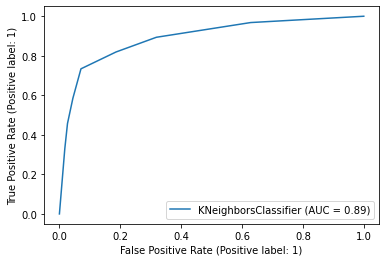

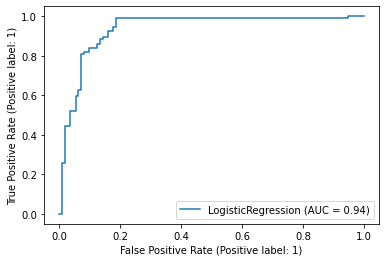

In [25]:
# ROC curve for kNN
metrics.RocCurveDisplay.from_estimator(model_knn,X_test,y_test)
plt.show()

metrics.RocCurveDisplay.from_estimator(model_logit,X_test,y_test)
plt.show()

From the above ROC Curves we can compute that Logistic Regression is a better model for this dataset then KNN Classifier, with only slight differences. The AUC of Logistic comes out to be 0.94, while for KNN it is 0.89. The Precision and Accuracy of Logisitc was also better then KNN. Hence, we will be moving forward with the Logistic model.

## 5. Model Evaluation <a class="anchor" id="evaluation"></a>

> [Table of Contents](#steps)

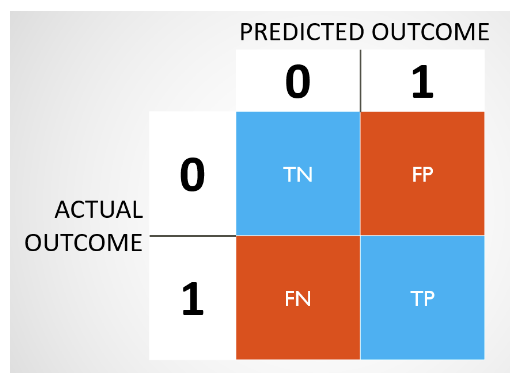

In this problem we are looking to minimize the **False Positives**, We don't want to falsly predict that a person will not default on the loan, when there are good chance that they will. There is a lot of hassle to get back the loan amount, there is alot of cost associated with it as well. If the lender considers a debt in default, the loan may be turned over to a collection agency(The cost to which has to be beared by the bank initially). If the collection agency is unsuccessful in securing a loan repayment, the agency can take the matter to court(costs of legal team) and pursue avenues like garnishing wages or putting a lien on a borrower’s home. When a person defaults, the bank has to put in a lot of money to get the loan amount back, plus the moeny is stuck for that period of time.

<hr>

The **False Positive Rate** is calculated as FP/FP+TN, where FP is the number of false positives and TN is the number of true negatives (FP+TN being the total number of negatives). It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative.

<hr>

The **False Negative Rate** – also called the miss rate – is the probability that a true positive will be missed by the test. It’s calculated as FN/FN+TP, where FN is the number of false negatives and TP is the number of true positives (FN+TP being the total number of positives).

<hr>

**Precision** 

Precision talks about how precise your model is out of those predicted positive, how many of them are actual positive. Precision is a good measure to determine, when the costs of False Positive is high.

<hr>

[**Probability Thresholds**](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)
The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the “decision threshold,” “discrimination threshold,” or simply the “threshold.” The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1.

For example, on a binary classification problem with class labels 0 and 1, normalized predicted probabilities and a threshold of 0.5, then values less than the threshold of 0.5 are assigned to class 0 and values greater than or equal to 0.5 are assigned to class 1.

- Prediction < 0.5 = Class 0
- Prediction >= 0.5 = Class 1

The problem is that the default threshold may not represent an optimal interpretation of the predicted probabilities. This could be possible when, 
- The class distribution is severely skewed.
- The cost of one type of misclassification is more important than another type of misclassification.

Hence, for the Logistic Regression we will compute the metrics at different thresholds and interpret the results.

<hr>


<h1>Threshold: 0.10</h1>

| Threshold:     	    |        0.10                                   |
| :---                  | :---                                          |
| False Positive Rate: 	| 42%                                           |
| False Negative Rate:  | 0.01%                                           |
| Precision:            | 0.66                                          |
| Accuracy:             | 0.77                                          |

> At Threshold 0.10, the **False Positive Rate** comes out to be 42%. There is  42% probability that a person will default on the loan when it is predicted that they won't. 42% is a high probability for such occurances. It can lead to severe operational costs.

> **False Negative Rate** comes out to be 0.01%, which is very good. It signifies that, only 1% of the people who are not likely to default the loan will be refued the loan. The model can be efficient at 1% FNR. However, the FPR is pretty high here.

> **Precision** It is the quality of a positive prediction made by the model. Our model is 77% precise in predicting the positives out of all the actual positives. It is good measure if False Positives are costlier, which is valid in our case.


<hr>

<h1>Threshold: 0.60</h1>

| Threshold:     	    |        0.60                                   |
| :---                  | :---                                          |
| False Positive Rate: 	| 7%                                           |
| False Negative Rate:  | 19%                                           |
| Precision:            | 0.91                                          |
| Accuracy:             | 0.87                                          |

> At Threshold 0.60, the **False Positive Rate** comes out to be 7%. There is 7% probability that a person will default on the loan when it is predicted that they won't. 7% is a very low probability for such occurances. It is pretty close to the ideal scenario of 0% FPR. We can definitely consider the threshold of 60%

> **False Negative Rate** comes out to be 0.19%, which is very good. It signifies that, only 19% of the people who are not likely to default the loan will be refued the loan. The bank can work around with 19% FNR. 

> **Precision** It is the quality of a positive prediction made by the model. Our model is 91% precise in predicting the positives out of all the actual positives. It is good measure if False Positives are costlier, which is valid in our case. 91% precision is considered to be very good for this model.


<hr>

<h1>Threshold: 0.80</h1>

| Threshold:     	    |        0.80                                   |
| :---                  | :---                                          |
| False Positive Rate: 	| 5%                                           |
| False Negative Rate:  | 41%                                           |
| Precision:            | 0.90                                          |
| Accuracy:             | 0.78                                          |

> At Threshold 0.60, the **False Positive Rate** comes out to be 5%. There is  5% probability that a person will default on the loan when it is predicted that they won't. 7% is a very low probability for such occurances. It is pretty close to the ideal scenario of 0% FPR. We can definitely consider the threshold of 60%

> **False Negative Rate** comes out to be 41%, which is pretty high. It signifies that, 41% of the people who are not likely to default the loan will be refued the loan. 41% is a lot of good customers beign denied the loan. It can further impact the loyalty of the customers in addition to affecting the bank's revenue from profits. 

> **Precision** It is the quality of a positive prediction made by the model. Our model is 78% precise in predicting the positives out of all the actual positives. It is good measure if False Positives are costlier, which is valid in our case. 78% precision is considered to be above average for this model, but we have have cases where the precision is pretty good. 


<hr>

## 6. Conclusion <a class="anchor" id="conclusion"></a>

> [Table of Contents](#steps)


After careful consideration of multiple probability threshold options and the corresponding speculated risks/costs. Probabilty Threshold of **0.60** seems to be the ideal choice here. At 0.60 threshold, the False Positive rate is at 7%, which is ideal for our business case. There is 7% probability that 7% probability that a person will default on the loan when it is predicted that they won't. The Model is predicting at a precision of 91%, and has a accuracy of 87%. Our model is 91% precise in predicting the positives out of all the actual positives. This is by far the best performane across all the probability thresholds.

<hr>

## 7. Deployment <a class="anchor" id="deployment"></a>

> [Table of Contents](#steps)


In [26]:
features = [features_means, features_std]

In [27]:
pickle_out = open('classifier_loan', mode='wb')                        # Here we are creating a new object 'pickle_out'. This will contain a new file 'classifier'  
                                                                       # in wb(write binary) mode to save the pickled data.

pickle.dump(model_logit, pickle_out)                                   # Here, the Logistic model is converted into byte stream and saved in 'model_logit'.
pickle.dump(model_knn, pickle_out)                                     # Here, the KNN model is converted into byte stream and saved in 'model_knn'.
features = [features_means, features_std]                              # Creating a list of features to pass into the pickle file
pickle.dump(features, pickle_out)

pickle_out.close()                                                     # Closing the file object. 

In [2]:
%%writefile Loan_prediction_app.py                                                     
                                                                       # %%writefile is used to write the code in this given block to a file called app.py, which will
                                                                       # be created in the same directory. 
import pickle                                                          # Importing the Pickle Library here to execute the app.py file without fail.
import streamlit as st                                                 # Importing the Streamlit library. Streamlit lets you turn data scripts into shareable web apps.
import extra_streamlit_components as stx
import time
import numpy as np

pickle_in = open('classifier_loan', 'rb')                                   # Opening Classifier in read-byte mode. 
model_logit = pickle.load(pickle_in)                                   # Pickle load is used to load pickled data from a file-like object.
model_knn = pickle.load(pickle_in)                                     # HEre, pickle is loading both KNN and Logistic regression models.
features = pickle.load(pickle_in)
st.set_page_config(layout="centered")

IMAGE_URL = "https://i.ibb.co/8gfCxvR/flight-img.png"
st.image(IMAGE_URL, width=700)


@st.cache()                                                            # Marking the function with cache decorator (st.cache()) will allow streamlit to keep all the 
                                                                       # states of a function in the memory. Hence, on every refresh the function definition is not executed.
    
def prediction(gender, age, debt, married, bank_customer,emp_industrial, emp_materials, emp_consumer_services,emp_healthcare, emp_financials, emp_utilities, emp_education,ethnicity_white, ethnicity_black, ethnicity_latino,ethnicity_asian, ethnicity_other, years_employed, prior_default,employed, credit_score, drivers_license, citizen_bybirth,citizen_other, citizen_temporary, Income, chosen_id):
    if chosen_id == '1':                                               # Based on the user's preference we are running the model (KNN or Logistic)
        classifier = model_knn
        model = 'KNN'
    else: 
        classifier = model_logit
        model = 'Logistic Regression'
       
    prediction = classifier.predict(                                   # method predict() that will essentially use the learned parameters by fit() in order to
                                                                       # perform predictions for each test instance.
        [[gender, age, debt, married, bank_customer,emp_industrial, emp_materials, emp_consumer_services,emp_healthcare, emp_financials, emp_utilities, emp_education,ethnicity_white, ethnicity_black, ethnicity_latino,ethnicity_asian, ethnicity_other, years_employed, prior_default,employed, credit_score, drivers_license, citizen_bybirth,citizen_other, citizen_temporary, Income]])
  
    return (prediction,model)


def main():                                                           # This is the main function in which we define our webpage's components

    gender = 0
    
    sex = st.radio("Gender ",('Male', 'Female'))

    if sex == 'Male':
        gender = 0
    else:
        gender = 1

        
    age = 0    
    age = st.slider("Age ",
                                  min_value=13.0,
                                  max_value=81.00,
                                  value=0.0,
                                  step=0.10,
                                 )


    debt = st.slider("Debt ",
                                  min_value=0.0,
                                  max_value=30.00,
                                  value=0.0,
                                  step=0.10,
                                 )
    
    married = 0
    
    m = st.radio("Marital Status ",('Married', 'Single'))

    if m == 'Male':
        married = 0
    else:
        married = 1

        
    bank_customer = 0
    
    b = st.radio("Current Customer ",('Yes', 'No'))

    if b == 'Yes':
        bank_customer = 0
    else:
        bank_customer = 1
        
        
    pe = st.selectbox('Previous Employer',
                          (
                          "Industrial",
                          "Materials",
                          "Consumer Services",
                          "Healthcare",
                              "Financials",
                              "Utilities",
                              "Education"
                          )
                          )
    emp_industrial, emp_materials, emp_consumer_services, emp_healthcare, emp_financials, emp_utilities, emp_education = 0,0,0,0,0,0,0 
    
    if pe == "Industrial":
        emp_industrial = 1
    elif pe == "Materials":
        emp_materials = 1
    elif pe == "Consumer Services":
        emp_consumer_services = 1
    elif pe == "Healthcare":
        emp_healthcare = 1
    elif pe == "Financials":
        emp_financials = 1
    elif pe == "Utilities":
        emp_utilities = 1
    elif pe == "Education":
        emp_education = 1
        
    
    
    eth = st.selectbox('Ethinicity',
                          (
                          "White",
                          "Black",
                          "Latino",
                          "Asian",
                              "Others",
                              "Utilities",
                              "Education"
                          )
                          )
    ethnicity_white, ethnicity_black, ethnicity_latino, ethnicity_asian, ethnicity_other = 0,0,0,0,0 
    
    if eth == "Industrial":
        ethnicity_white = 1
    elif eth == "Materials":
        ethnicity_black = 1
    elif eth == "Consumer Services":
        ethnicity_latino = 1
    elif eth == "Healthcare":
        ethnicity_asian = 1
    elif eth == "Financials":
        ethnicity_other = 1

        
    years_employed = st.slider("Years of Employment ",
                                  min_value=0.0,
                                  max_value=5.00,
                                  value=0.0,
                                  step=0.10,
                                 )   
        
        
        
    prior_default = 0
    
    pd = st.radio("Prior Default ",('Yes', 'No'))

    if pd == 'Yes':
        prior_default = 1
    else:
        prior_default = 0
        
        
    employed = 0
    
    emp = st.radio("Currently Employed ",('Yes', 'No'))

    if emp == 'Yes':
        employed = 1
    else:
        employed = 0
        
    credit_score = st.slider("Credit Score",
                                  min_value=0.0,
                                  max_value=7.00,
                                  value=0.0,
                                  step=0.05,
                                 )  
        
        
    drivers_license = 0
    
    dl = st.radio("Drivers License ",('Yes', 'No'))

    if dl == 'Yes':
        drivers_license = 1
    else:
        drivers_license = 0
        
        
        
    ctz = st.selectbox('Citizenship',
                          (
                          "By Birth",
                          "Other",
                          "Temporary"
                          )
                          )
    citizen_bybirth, citizen_other, citizen_temporary = 0,0,0
    
    if ctz == "By Birth":
        citizen_bybirth = 1
    elif ctz == "Other":
        citizen_other = 1
    elif ctz == "Temporary":
        citizen_temporary = 1   
        
    Income = st.slider("Income",
                                  min_value=0.0,
                                  max_value=7.00,
                                  value=0.0,
                                  step=0.05,
                                 )  
        
   

    Income = np.log2(Income+1).round(2)   # Taking log as we did before training the model
    years_employed = (years_employed-features[0][0])/features[1][0] # Scaling the model as we did before training the model
    credit_score = (credit_score-features[0][1])/features[1][1]
    age = (age-features[0][2])/features[1][2]
    debt = (debt-features[0][3])/features[1][3]
    

    chosen_id = stx.tab_bar(data=[                                   # Allowing user to choose between the models.
    stx.TabBarItemData(id=1, title="KNN Classifier", description="Precision: 92% | Accuracy: 79%"),
    stx.TabBarItemData(id=2, title="Logistic Regression", description="Precision: 91% | Accuracy: 87%"),
    ],default=1)
    st.info('Recommendation based on the AUC-ROC Curve: Logistic Regression', icon="ℹ️")

  
    result = ""
                                  
    if st.button("Predict"):                                          # When 'Predict' is clicked(using st.button), make the prediction and store it in result.
        results = prediction(gender, age, debt, married, bank_customer,emp_industrial, emp_materials, emp_consumer_services,emp_healthcare, emp_financials, emp_utilities, emp_education,ethnicity_white, ethnicity_black, ethnicity_latino,ethnicity_asian, ethnicity_other, years_employed, prior_default,employed, credit_score, drivers_license, citizen_bybirth,citizen_other, citizen_temporary, Income, chosen_id)
        with st.spinner('Running the '+results[1]+' model'):
            time.sleep(1)
            if results[0] == 0:
                st.error('Loan Denied!', icon="🚨")
            else:
                st.success('Loan Approved!', icon="✅")
#                 st.balloons()
            

            
if __name__=='__main__':                                              # The value of __name__ attribute is set to “__main__” when module is run as main program. 
    main()
    

Overwriting Loan_prediction_app.py


In [3]:
!streamlit run Loan_prediction_app.py                                                 # Running the app.py using streamlit.

^C
